In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Model persistence
import pickle
import joblib

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print("📊 Ready for Insurance Fraud Detection Analysis")


✅ All libraries imported successfully!
📊 Ready for Insurance Fraud Detection Analysis


In [3]:
# Load the dataset
df = pd.read_csv('data/insurance_claims.csv')

print("🔍 Dataset Shape:", df.shape)
print(f"📋 Total Records: {len(df):,}")
print(f"📊 Total Features: {df.shape[1]}")
print("\n" + "="*50)

# Display first few rows
print("👀 First 5 Records:")
print(df.head())

print("\n" + "="*50)

# Basic information about dataset
print("📋 Dataset Information:")
print(df.info())

print("\n" + "="*50)

# Check for missing values
print("🔍 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✅ No missing values found!")


🔍 Dataset Shape: (1000, 40)
📋 Total Records: 1,000
📊 Total Features: 40

👀 First 5 Records:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_z

📊 Statistical Summary:
       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.61094

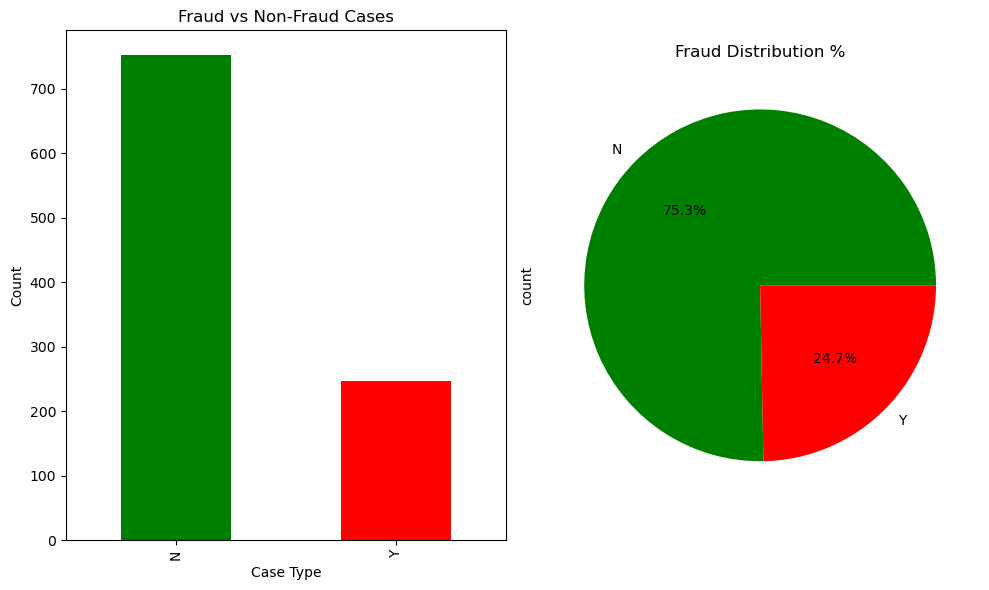

In [4]:
# Statistical summary
print("📊 Statistical Summary:")
print(df.describe())

print("\n" + "="*50)

# Check target variable distribution
if 'fraud_reported' in df.columns:
    target_col = 'fraud_reported'
elif 'FraudFound_P' in df.columns:
    target_col = 'FraudFound_P'
else:
    # Find the target column
    possible_targets = ['fraud', 'is_fraud', 'fraudulent', 'claim_status']
    target_col = None
    for col in possible_targets:
        if col in df.columns:
            target_col = col
            break

print(f"🎯 Target Variable: {target_col}")
print("📊 Fraud Distribution:")
fraud_counts = df[target_col].value_counts()
print(fraud_counts)

# Calculate fraud percentage
fraud_percentage = (fraud_counts.iloc[1] / fraud_counts.sum()) * 100
print(f"🚨 Fraud Rate: {fraud_percentage:.2f}%")

# Visualize fraud distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df[target_col].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fraud vs Non-Fraud Cases')
plt.xlabel('Case Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df[target_col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Fraud Distribution %')
plt.tight_layout()
plt.show()


🔄 Processing Categorical Variables...
📝 Categorical Columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
✅ Encoded: policy_bind_date
✅ Encoded: policy_state
✅ Encoded: policy_csl
✅ Encoded: insured_sex
✅ Encoded: insured_education_level
✅ Encoded: insured_occupation
✅ Encoded: insured_hobbies
✅ Encoded: insured_relationship
✅ Encoded: incident_date
✅ Encoded: incident_type
✅ Encoded: collision_type
✅ Encoded: incident_severity
✅ Encoded: authorities_contacted
✅ Encoded: incident_state
✅ Encoded: incident_city
✅ Encoded: incident_location
✅ Encoded: property_damage
✅ Encoded: police_report_available
✅ Encoded: auto_make
✅ Encoded: aut

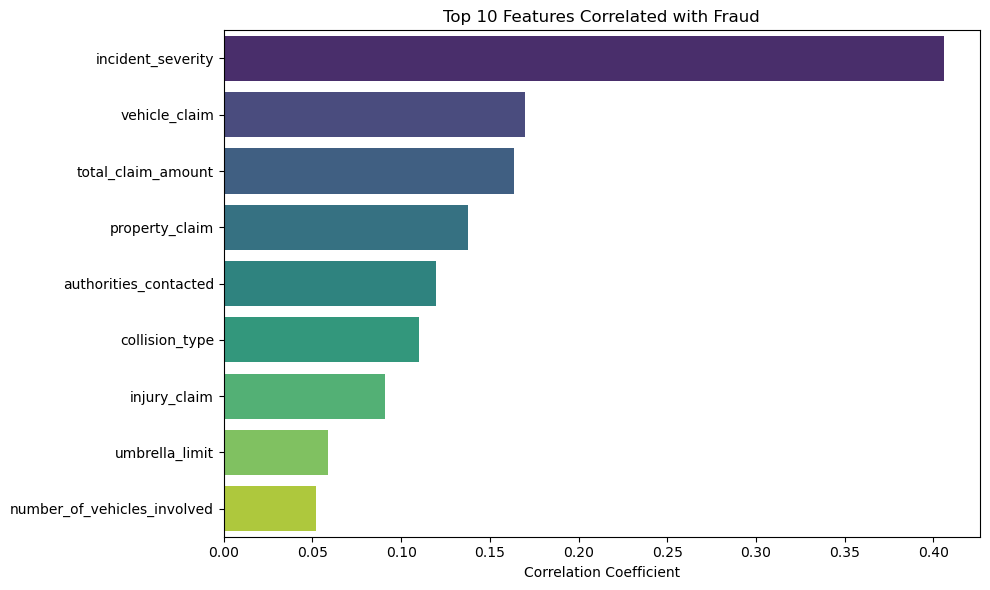

In [5]:
# Create a copy for processing
df_processed = df.copy()

# Handle categorical variables
print("🔄 Processing Categorical Variables...")

categorical_columns = df_processed.select_dtypes(include=['object']).columns
print(f"📝 Categorical Columns: {list(categorical_columns)}")

# Label Encoding for categorical variables
label_encoders = {}
for column in categorical_columns:
    if column != target_col:  # Don't encode target variable yet
        le = LabelEncoder()
        df_processed[column] = le.fit_transform(df_processed[column])
        label_encoders[column] = le
        print(f"✅ Encoded: {column}")

# Encode target variable
if df_processed[target_col].dtype == 'object':
    le_target = LabelEncoder()
    df_processed[target_col] = le_target.fit_transform(df_processed[target_col])
    print(f"✅ Target variable encoded: {target_col}")

print("\n" + "="*50)

# Feature correlation analysis
print("🔗 Feature Correlation with Target:")
correlation = df_processed.corr()[target_col].abs().sort_values(ascending=False)
print(correlation.head(10))

# Visualize top correlations
plt.figure(figsize=(10, 6))
top_features = correlation.head(10).drop(target_col)
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Features Correlated with Fraud')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


In [9]:
# Prepare features and target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

print(f"🎯 Features Shape: {X.shape}")
print(f"🎯 Target Shape: {y.shape}")

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📚 Training Set: {X_train.shape[0]} samples")
print(f"🧪 Test Set: {X_test.shape[0]} samples")

print("\n" + "="*50)

# Scale the features (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")

print("\n" + "="*50)

# Train Multiple Models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"🤖 Training {name}...")
    
    # Use scaled data for Logistic Regression, original for Random Forest
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'model': model
    }
    
    print(f"✅ {name} trained!")
    print(f"   Accuracy: {accuracy:.3f}")
    print(f"   Precision: {precision:.3f}")
    print(f"   Recall: {recall:.3f}")
    print(f"   F1-Score: {f1:.3f}")
    print("-" * 30)


🎯 Features Shape: (1000, 38)
🎯 Target Shape: (1000,)
📚 Training Set: 800 samples
🧪 Test Set: 200 samples

✅ Features scaled successfully!

🤖 Training Random Forest...
✅ Random Forest trained!
   Accuracy: 0.805
   Precision: 0.679
   Recall: 0.388
   F1-Score: 0.494
------------------------------
🤖 Training Logistic Regression...
✅ Logistic Regression trained!
   Accuracy: 0.810
   Precision: 0.704
   Recall: 0.388
   F1-Score: 0.500
------------------------------


In [7]:
print("🔍 DETAILED MISSING VALUES ANALYSIS")
print("=" * 60)

# Check missing values for each column
missing_info = pd.DataFrame({
    'Column': df_processed.columns,
    'Missing_Count': df_processed.isnull().sum(),
    'Missing_Percentage': (df_processed.isnull().sum() / len(df_processed)) * 100,
    'Data_Type': df_processed.dtypes
})

# Show only columns with missing values
missing_columns = missing_info[missing_info['Missing_Count'] > 0]

if len(missing_columns) > 0:
    print("📊 Columns with Missing Values:")
    print(missing_columns.to_string(index=False))
    print("\n" + "=" * 60)
    
    # Strategy for handling missing values
    print("🛠️ APPLYING MISSING VALUE TREATMENT:")
    
    for idx, row in missing_columns.iterrows():
        col_name = row['Column']
        missing_count = row['Missing_Count']
        missing_pct = row['Missing_Percentage']
        data_type = row['Data_Type']
        
        print(f"\n🔧 Processing: {col_name}")
        print(f"   Missing: {missing_count} ({missing_pct:.1f}%)")
        
        if missing_pct > 50:
            # If more than 50% missing, drop the column
            print(f"   ❌ DROPPING COLUMN (>50% missing)")
            df_processed = df_processed.drop(columns=[col_name])
            
        elif data_type in ['object', 'category']:
            # For categorical data, fill with mode (most frequent value)
            mode_value = df_processed[col_name].mode()[0] if not df_processed[col_name].mode().empty else 'Unknown'
            df_processed[col_name].fillna(mode_value, inplace=True)
            print(f"   ✅ FILLED with MODE: '{mode_value}'")
            
        elif data_type in ['int64', 'float64', 'int32', 'float32']:
            # For numerical data, fill with median (robust to outliers)
            median_value = df_processed[col_name].median()
            df_processed[col_name].fillna(median_value, inplace=True)
            print(f"   ✅ FILLED with MEDIAN: {median_value:.2f}")
        
        else:
            # For other data types, drop rows with missing values
            df_processed = df_processed.dropna(subset=[col_name])
            print(f"   ✅ DROPPED ROWS with missing values")

    print("\n" + "=" * 60)
    print("🎉 MISSING VALUE TREATMENT COMPLETED!")
    
else:
    print("✅ NO MISSING VALUES FOUND!")

# Final verification
final_missing = df_processed.isnull().sum().sum()
print(f"\n📊 FINAL CHECK:")
print(f"   Total Missing Values: {final_missing}")
print(f"   Dataset Shape: {df_processed.shape}")

if final_missing == 0:
    print("✅ DATASET IS CLEAN - READY FOR MODEL TRAINING!")
else:
    print("❌ Still some missing values - need more cleaning")

# Check for infinite values too (another common issue)
print(f"\n🔍 CHECKING FOR INFINITE VALUES:")
infinite_count = np.isinf(df_processed.select_dtypes(include=[np.number])).sum().sum()
print(f"   Infinite Values: {infinite_count}")

if infinite_count > 0:
    print("🛠️ FIXING INFINITE VALUES...")
    # Replace infinite values with NaN, then fill with median
    numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
    df_processed[numeric_columns] = df_processed[numeric_columns].replace([np.inf, -np.inf], np.nan)
    
    for col in numeric_columns:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"   ✅ Fixed infinite values in: {col}")

print("\n🎯 DATA CLEANING COMPLETED SUCCESSFULLY!")
print("=" * 60)


🔍 DETAILED MISSING VALUES ANALYSIS
📊 Columns with Missing Values:
Column  Missing_Count  Missing_Percentage Data_Type
  _c39           1000               100.0   float64

🛠️ APPLYING MISSING VALUE TREATMENT:

🔧 Processing: _c39
   Missing: 1000 (100.0%)
   ❌ DROPPING COLUMN (>50% missing)

🎉 MISSING VALUE TREATMENT COMPLETED!

📊 FINAL CHECK:
   Total Missing Values: 0
   Dataset Shape: (1000, 39)
✅ DATASET IS CLEAN - READY FOR MODEL TRAINING!

🔍 CHECKING FOR INFINITE VALUES:
   Infinite Values: 0

🎯 DATA CLEANING COMPLETED SUCCESSFULLY!


In [8]:
# FINAL DATA VERIFICATION BEFORE MODEL TRAINING
print("🔍 PRE-TRAINING DATA VERIFICATION")
print("=" * 50)

# Double-check for any remaining issues
missing_check = df_processed.isnull().sum().sum()
infinite_check = np.isinf(df_processed.select_dtypes(include=[np.number])).sum().sum()

print(f"Missing Values: {missing_check}")
print(f"Infinite Values: {infinite_check}")
print(f"Dataset Shape: {df_processed.shape}")

if missing_check > 0 or infinite_check > 0:
    print("❌ DATA STILL HAS ISSUES - CANNOT PROCEED")
    print("Please run the missing value treatment cell again")
else:
    print("✅ DATA IS CLEAN - PROCEEDING WITH MODEL TRAINING")

print("\n" + "=" * 50)

# Prepare features and target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

print(f"🎯 Features Shape: {X.shape}")
print(f"🎯 Target Shape: {y.shape}")
print(f"🎯 Feature Columns: {list(X.columns)}")

# Verify no missing values in final X and y
print(f"\n🔍 Final Verification:")
print(f"   Missing in X: {X.isnull().sum().sum()}")
print(f"   Missing in y: {y.isnull().sum()}")

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📚 Training Set: {X_train.shape[0]} samples")
print(f"🧪 Test Set: {X_test.shape[0]} samples")

# Verify splits don't have missing values
print(f"\n🔍 Split Verification:")
print(f"   Missing in X_train: {X_train.isnull().sum().sum()}")
print(f"   Missing in X_test: {X_test.isnull().sum().sum()}")
print(f"   Missing in y_train: {y_train.isnull().sum()}")
print(f"   Missing in y_test: {y_test.isnull().sum()}")

print("\n" + "=" * 50)

# Scale the features (normalize the data)
scaler = StandardScaler()

# Handle any potential issues during scaling
try:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("✅ Features scaled successfully!")
except Exception as e:
    print(f"❌ Scaling Error: {e}")
    # If scaling fails, identify problematic columns
    for col in X_train.columns:
        col_data = X_train[col]
        if col_data.isnull().any():
            print(f"   Problem column: {col} - has NaN values")
        if np.isinf(col_data).any():
            print(f"   Problem column: {col} - has infinite values")
    raise e

print("\n" + "=" * 50)

# Train Multiple Models with Error Handling
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f"🤖 Training {name}...")
    
    try:
        # Use scaled data for Logistic Regression, original for Random Forest
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'model': model
        }
        
        print(f"✅ {name} trained successfully!")
        print(f"   Accuracy: {accuracy:.3f}")
        print(f"   Precision: {precision:.3f}")
        print(f"   Recall: {recall:.3f}")
        print(f"   F1-Score: {f1:.3f}")
        print("-" * 30)
        
    except Exception as e:
        print(f"❌ Error training {name}: {str(e)}")
        print(f"   Skipping this model...")
        continue

if not results:
    print("❌ NO MODELS WERE SUCCESSFULLY TRAINED!")
    print("Please check your data preprocessing steps.")
else:
    print(f"\n🎉 Successfully trained {len(results)} models!")


🔍 PRE-TRAINING DATA VERIFICATION
Missing Values: 0
Infinite Values: 0
Dataset Shape: (1000, 39)
✅ DATA IS CLEAN - PROCEEDING WITH MODEL TRAINING

🎯 Features Shape: (1000, 38)
🎯 Target Shape: (1000,)
🎯 Feature Columns: ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year']

🔍 Final Verification:
   Missing in X: 0
   Missing in y: 0



In [11]:
# SAFE MODEL SAVING WITH ERROR HANDLING
print("💾 SAVING TRAINED MODELS...")
print("=" * 50)

# Create models directory if it doesn't exist
import os
os.makedirs('models', exist_ok=True)

# Check if models were trained successfully
if 'results' in locals() and len(results) > 0:
    print("✅ Found trained models!")
    
    # Select best model based on F1-score
    best_model_name = max(results.keys(), key=lambda k: results[k]['f1_score'])
    best_model = results[best_model_name]['model']
    
    print(f"🏆 Best Model: {best_model_name}")
    print(f"🎯 F1-Score: {results[best_model_name]['f1_score']:.3f}")
    
    # Save the best model
    model_filename = f'models/{best_model_name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(best_model, model_filename)
    print(f"✅ Model saved: {model_filename}")
    
    # Save all models (backup)
    print(f"\n💾 Saving all trained models:")
    for model_name, model_data in results.items():
        filename = f'models/{model_name.lower().replace(" ", "_")}_model.pkl'
        joblib.dump(model_data['model'], filename)
        print(f"✅ Saved: {model_name} -> {filename}")
    
    # Save the scaler (if exists)
    if 'scaler' in locals():
        scaler_filename = 'models/scaler.pkl'
        joblib.dump(scaler, scaler_filename)
        print(f"✅ Scaler saved: {scaler_filename}")
    
    # Save label encoders (if exists)
    if 'label_encoders' in locals():
        encoders_filename = 'models/label_encoders.pkl'
        joblib.dump(label_encoders, encoders_filename)
        print(f"✅ Encoders saved: {encoders_filename}")
    
    # Save feature names
    if 'X' in locals():
        feature_names = list(X.columns)
        features_filename = 'models/feature_names.pkl'
        joblib.dump(feature_names, features_filename)
        print(f"✅ Feature names saved: {features_filename}")
    
    # Save results summary
    results_summary = {}
    for name, data in results.items():
        results_summary[name] = {
            'accuracy': data['accuracy'],
            'precision': data['precision'], 
            'recall': data['recall'],
            'f1_score': data['f1_score']
        }
    
    summary_filename = 'models/model_results.pkl'
    joblib.dump(results_summary, summary_filename)
    print(f"✅ Results summary saved: {summary_filename}")
    
    print(f"\n🎉 MODEL SAVING COMPLETED SUCCESSFULLY!")
    print(f"🏆 Best Model: {best_model_name}")
    print(f"📊 Best Accuracy: {results[best_model_name]['accuracy']:.3f}")
    print(f"🎯 Best F1-Score: {results[best_model_name]['f1_score']:.3f}")

else:
    print("❌ NO TRAINED MODELS FOUND!")
    print("🔍 Available variables:", [var for var in locals().keys() if not var.startswith('_')])
    
    # Try to find any trained models in variables
    potential_models = {}
    for var_name in locals().keys():
        var_value = locals()[var_name]
        if hasattr(var_value, 'predict') and hasattr(var_value, 'fit'):
            potential_models[var_name] = var_value
    
    if potential_models:
        print(f"🔍 Found potential models: {list(potential_models.keys())}")
        print("💡 Manually saving found models...")
        
        for model_name, model in potential_models.items():
            filename = f'models/{model_name}_manual.pkl'
            try:
                joblib.dump(model, filename)
                print(f"✅ Manually saved: {model_name} -> {filename}")
            except Exception as e:
                print(f"❌ Failed to save {model_name}: {e}")
    else:
        print("❌ No models found at all!")
        print("💡 Please re-run the model training cell (Cell 6) first.")

print("=" * 50)


💾 SAVING TRAINED MODELS...
✅ Found trained models!
🏆 Best Model: Logistic Regression
🎯 F1-Score: 0.500
✅ Model saved: models/logistic_regression_model.pkl

💾 Saving all trained models:
✅ Saved: Random Forest -> models/random_forest_model.pkl
✅ Saved: Logistic Regression -> models/logistic_regression_model.pkl
✅ Scaler saved: models/scaler.pkl
✅ Encoders saved: models/label_encoders.pkl
✅ Feature names saved: models/feature_names.pkl
✅ Results summary saved: models/model_results.pkl

🎉 MODEL SAVING COMPLETED SUCCESSFULLY!
🏆 Best Model: Logistic Regression
📊 Best Accuracy: 0.810
🎯 Best F1-Score: 0.500
